In [1]:
pip install astropy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

Now we are ready to load some FITS file.We will open the M13 FITS file. To load one of these in to Python we use the open function, and pass the location of the file we want as the first argument. We took the fits file from "https://dr12.sdss.org/fields/"

In [3]:
M42 = fits.open('/content/frame-u-006073-4-0063.fits')

Printing Information Of the FITS File

In [4]:
M42

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f3e8f56e680>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f3e8f56fd00>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f3e8f56fee0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f3e8d870100>]

In [5]:
M42.info()

Filename: /content/frame-u-006073-4-0063.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


The image information is located in the PRIMARY block. We can see that it's made up of two HDU (Header Data Unit) objects. A HDU is a high level FITS file component, typically containing data and an associated header.

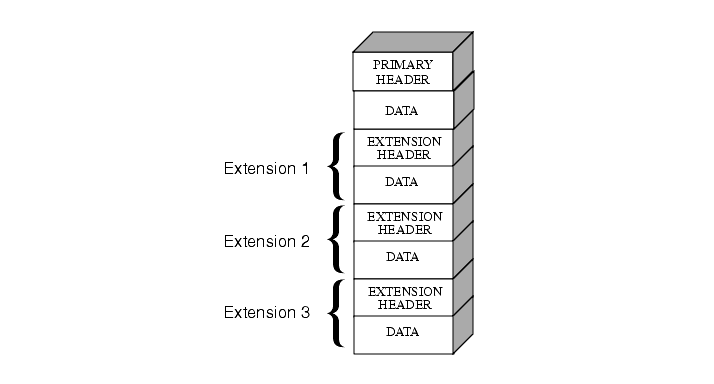

In [6]:
# Printing Information Of Primary Block
M42[0]

In [7]:
M42[0].header

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4649973257.37 / 1st row Number of seconds since Nov 17 1858    
RA      =            83.820000 / 1st row RA of telescope boresight (deg)        
DEC     =           -5.349071  / 1st row Dec of telescope boresight (degrees)   
SPA     =             180.000  / 1st row Cam col position angle wrt N (deg)     
IPA     =             137.18

In [8]:
# We are only interested in primary block and will extract its data
data = M42[0].data

In [9]:
type(data)

numpy.ndarray

Our Image is stored as 2D array

In [10]:
data.shape

(1489, 2048)

In [11]:
data.dtype.name

'float32'

In [12]:
# Printing some statistics of the Image/2D Array
print(data)
print('Min:', np.min(data))
print('Max:', np.max(data))
print('Mean:', np.mean(data))
print('Stdev:', np.std(data))

[[ 2.4609375e-01  1.9140625e-01  9.5703125e-01 ...  2.1923828e-01
   1.2008667e-02  6.7260742e-02]
 [ 1.0937500e-01  1.9140625e-01  1.0390625e+00 ...  1.1993408e-02
   6.7260742e-02  1.3623047e-01]
 [ 1.0937500e-01  2.1875000e-01  1.1074219e+00 ... -4.3273926e-02
  -2.9449463e-02  1.1978149e-02]
 ...
 [ 1.8750000e-01  2.1508789e-01  9.2375000e+01 ...  2.4291992e-01
   1.6015625e-01  2.2900391e-01]
 [ 2.4218750e-01  2.8320312e-01  8.9750000e+01 ...  1.7382812e-01
   2.7050781e-01  1.6015625e-01]
 [ 1.8750000e-01  6.4575195e-02  8.7500000e+01 ...  1.4624023e-01
   1.3256836e-01  1.7382812e-01]]
Min: -0.34472656
Max: 552.0
Mean: 5.3398747
Stdev: 15.16415


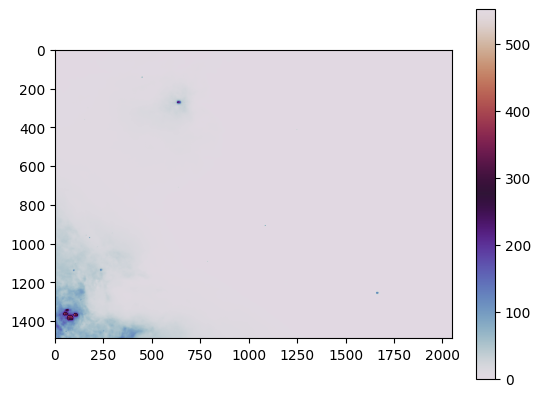

In [13]:
# Printing the Image
plt.imshow(data, cmap='twilight')
plt.colorbar()

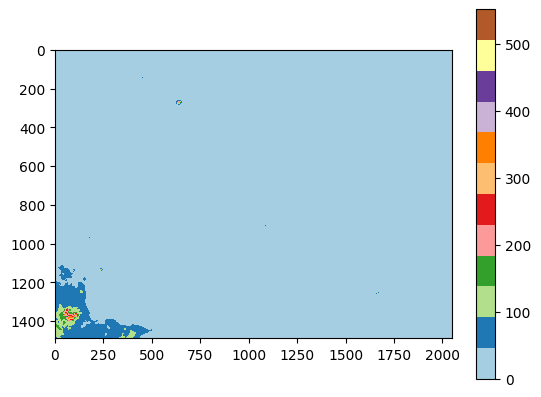

In [14]:
plt.imshow(data, cmap='Paired')
plt.colorbar()

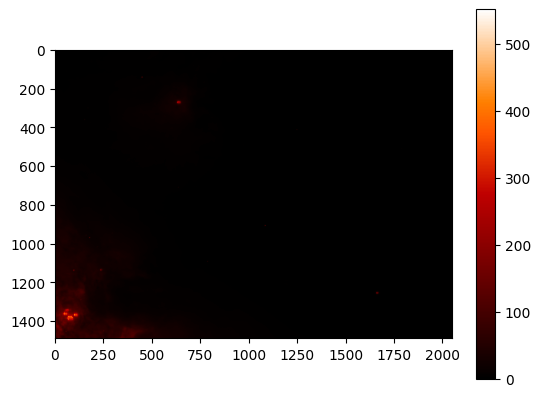

In [15]:
plt.imshow(data, cmap='gist_heat')
plt.colorbar()

Now we will be printing Histogrm , which will help us to understand the Values of **Brighteness for Each Pixel**. For printing the histogram we need to flaten the array

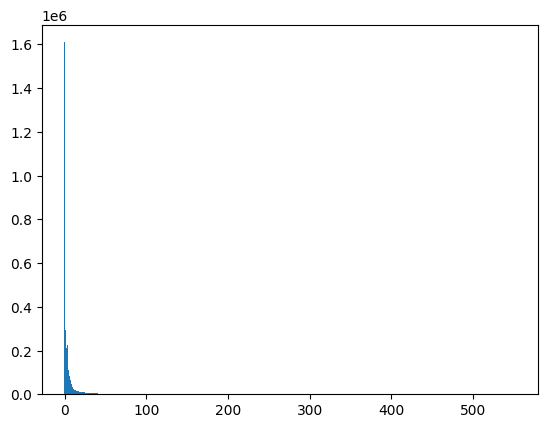

In [16]:
histogram = plt.hist(data.flat, bins=500)

As we Can observe that most of the High Brighteness values are from 0 to 100, so we will scale the image to that values.

[Text(1, 4000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

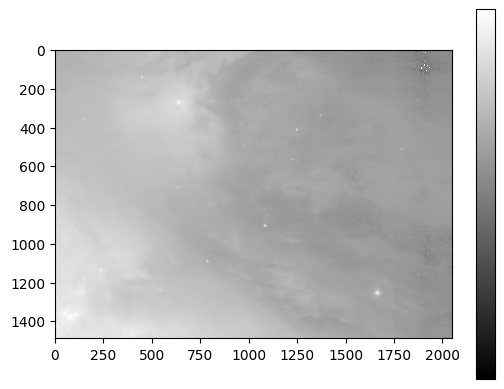

In [17]:
from matplotlib.colors import LogNorm
# Scaling the Vaues to Logarethemic values

plt.imshow(data, cmap='gray', norm=LogNorm(),)
cbar = plt.colorbar(ticks=[4.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

Now we will Produce an **RGB IMAGE OF M42**

In [19]:
M42u = fits.open('frame-u-006073-4-0063.fits')
M42i = fits.open('frame-i-006073-4-0063.fits')
M42g = fits.open('frame-g-006073-4-0063.fits')

In [21]:
# Function used for making RGB image
from astropy.visualization import make_lupton_rgb
g = M42g[0].data
i = M42i[0].data
u = M42u[0].data

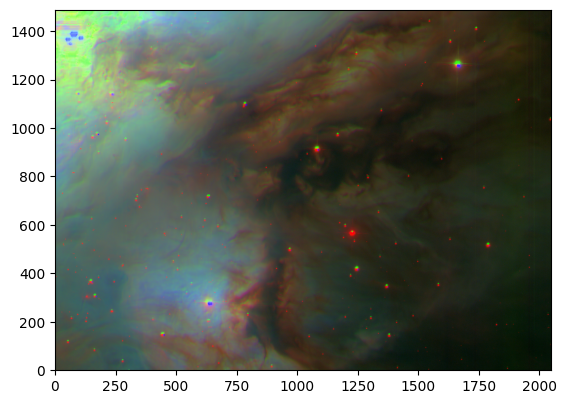

In [34]:
#it has the following value   R G B 
rgb_default = make_lupton_rgb(i,g,u,stretch=2.5,Q=10)


plt.imshow(rgb_default, origin='lower')
plt.savefig("rgbM42.jpg")